In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut
from IPython.display import display

In [2]:
diabetes=load_diabetes(as_frame=True)
X=diabetes.data
y=diabetes.target
print("Dataset shape:", X.shape)

Dataset shape: (442, 10)


In [3]:
loo=LeaveOneOut()
model=LinearRegression()

In [4]:
mse_scores=[]
y_actual=[]
y_predicted=[]

for train_idx, test_idx in loo.split(X):
    X_train, X_test=X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test=y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    y_actual.append(y_test)
    y_predicted.append(y_pred[0])

In [5]:
print("Total folds:", len(mse_scores))
print("Mean MSE:", np.mean(mse_scores))
print("Overall R²:", r2_score(y_actual, y_predicted))

Total folds: 442
Mean MSE: 3001.752846999431
Overall R²: 0.49379239240150874


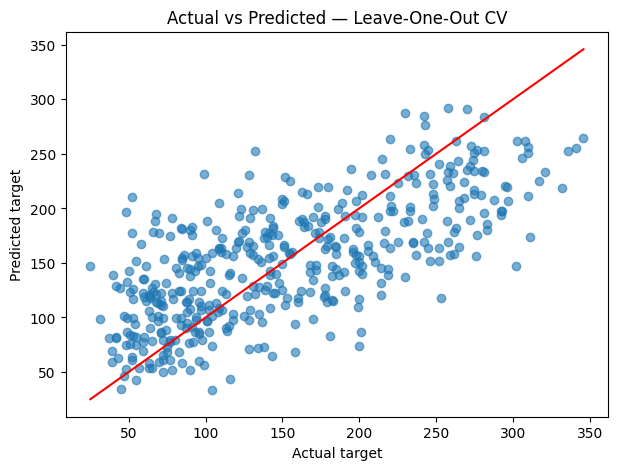

In [7]:
y_actual = np.array(y_actual).flatten()
y_predicted = np.array(y_predicted).flatten()

plt.figure(figsize=(7,5))
plt.scatter(y_actual, y_predicted, alpha=0.6)
plt.plot(
    [y_actual.min(), y_actual.max()],
    [y_actual.min(), y_actual.max()],
    color='red'
)
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Actual vs Predicted — Leave-One-Out CV")
plt.show()